# **CHECKING PYTHON AND PACKAGES' VERSION**

In [1]:
!python -V

Python 3.9.12


In [2]:
pip list | findstr pandas-profiling


pandas-profiling              3.6.6
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list | findstr numpy== | findstr pandas== | findstr matplotlib== | findstr seaborn== | findstr pandas-profiling== | findstr transformers== | findstr datasets==

Note: you may need to restart the kernel to use updated packages.


# **IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import load_metric, Dataset

C:\Users\danya\AppData\Local\Temp\ipykernel_9780\2949124418.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# **IMPORTING THE TRAINING AND TESTING DATASETS**

In [2]:
train_df = pd.read_csv("twitter_training.csv", names=["id", "entity", "sentiment", "text"])
test_df = pd.read_csv("twitter_validation.csv", names=["id", "entity", "sentiment", "text"])

# **Simple EDA**

Training set: 50 rows
Test set: 1000 rows


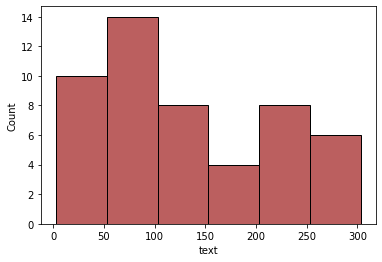

id       entity sentiment  \
sentiment                                   
Negative  29  2405  Borderlands  Negative   
          24  2405  Borderlands  Negative   
Neutral   14  2403  Borderlands   Neutral   
          15  2403  Borderlands   Neutral   
Positive  6   2402  Borderlands  Positive   
          20  2404  Borderlands  Positive   

                                                           text  
sentiment                                                        
Negative  29  the biggest dissappoinment in my life came bac...  
          24  the biggest dissappoinment in my life came out...  
Neutral   14  Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...  
          15  Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...  
Positive  6   So I spent a few hours making something for fu...  
          20  that was the first borderlands session in a lo...

In [9]:
train_df.isna().sum()
test_df.isna().sum()
train_df = train_df.dropna()
print(f"Training set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")
sns.histplot(train_df["text"].str.len(), color="brown", binwidth=50)
plt.show()
sample_size = 2
train_df.groupby('sentiment').apply(lambda x: x.sample(sample_size))

# **CREATE A MAPPING OF LABELS TO NUMBERS**

In [10]:
labels = list(train_df['sentiment'].unique())
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
train_df['label'] = train_df['sentiment'].map(label2id)
test_df['label'] = test_df['sentiment'].map(label2id)

# **GENERATIC THE PROJECT REPORTS BY USING THE PANDAS PROFILING**

In [3]:
ee=pp.ProfileReport(train_df)
ee.to_file("TwitterSentimentAnalysisReport-TRAIN.html")
ee=pp.ProfileReport(test_df)
ee.to_file("TwitterSentimentAnalysisReport-TEST.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **LOAD DATASET USING THE HUGGING FACE DATASETS LIBRARY AND PREPROCESS DATA**

In [36]:
# Filter out instances with missing or empty text data
train_df = train_df.dropna(subset=['text'])
test_df = test_df.dropna(subset=['text'])

# Load dataset using the Hugging Face Datasets library and preprocess data
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
train = train_df.sample(frac=0.9, random_state=42)
valid = train_df.drop(train.index)
train_ds = Dataset.from_pandas(train)
valid_ds = Dataset.from_pandas(valid)
test_ds = Dataset.from_pandas(test_df)
tokenizer = AutoTokenizer.from_pretrained(model_name)
train_ds = train_ds.filter(lambda x: x['text'] is not None and x['text'] != '').map(lambda x: tokenizer(x['text'], truncation=True, max_length=128), batched=True)
valid_ds = valid_ds.filter(lambda x: x['text'] is not None and x['text'] != '').map(lambda x: tokenizer(x['text'], truncation=True, max_length=128), batched=True)
test_ds = test_ds.filter(lambda x: x['text'] is not None and x['text'] != '').map(lambda x: tokenizer(x['text'], truncation=True, max_length=128), batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\danya/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

# **DEFINE METRICS**

In [37]:
accuracy = load_metric('accuracy')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# **TRAIN THE MODEL**

In [38]:
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=len(labels), id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True)
model.config

loading configuration file config.json from cache at C:\Users\danya/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Positive",
    "1": "Neutral",
    "2": "Negative"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Negative": 2,
    "Neutral": 1,
    "Positive": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "abso

RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Positive",
    "1": "Neutral",
    "2": "Negative"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Negative": 2,
    "Neutral": 1,
    "Positive": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [40]:
type(test_ds)

datasets.arrow_dataset.Dataset

In [43]:
len(test_ds.features)


6

In [14]:
training_args = TrainingArguments(
output_dir="twitter-sentiment-detector",
learning_rate=0.1,
per_device_train_batch_size=64,
per_device_eval_batch_size=64,
num_train_epochs=1,
weight_decay=0.01,
evaluation_strategy="epoch",
save_strategy="epoch",
load_best_model_at_end=True,
report_to="none"
)
trainer = Trainer(
model=model,
args=training_args,
train_dataset=train_ds,
eval_dataset=valid_ds,
tokenizer=tokenizer,
data_collator=data_collator,
compute_metrics=compute_metrics
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text, sentiment, id, entity. If __index_level_0__, text, sentiment, id, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
c:\Users\danya\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 45
  Num Epochs = 3
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 3
  Number of trainable parameters = 124647939


  0%|          | 0/3 [00:00<?, ?it/s]

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text, sentiment, id, entity. If __index_level_0__, text, sentiment, id, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to twitter-sentiment-detector\checkpoint-1
Configuration saved in twitter-sentiment-detector\checkpoint-1\config.json


{'eval_loss': 37.24072265625, 'eval_accuracy': 0.4, 'eval_runtime': 31.1457, 'eval_samples_per_second': 0.161, 'eval_steps_per_second': 0.032, 'epoch': 1.0}


Model weights saved in twitter-sentiment-detector\checkpoint-1\pytorch_model.bin
tokenizer config file saved in twitter-sentiment-detector\checkpoint-1\tokenizer_config.json
Special tokens file saved in twitter-sentiment-detector\checkpoint-1\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text, sentiment, id, entity. If __index_level_0__, text, sentiment, id, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to twitter-sentiment-detector\checkpoint-2
Configuration saved in twitter-sentiment-detector\checkpoint-2\config.json


{'eval_loss': 8.54154109954834, 'eval_accuracy': 0.2, 'eval_runtime': 40.125, 'eval_samples_per_second': 0.125, 'eval_steps_per_second': 0.025, 'epoch': 2.0}


Model weights saved in twitter-sentiment-detector\checkpoint-2\pytorch_model.bin
tokenizer config file saved in twitter-sentiment-detector\checkpoint-2\tokenizer_config.json
Special tokens file saved in twitter-sentiment-detector\checkpoint-2\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text, sentiment, id, entity. If __index_level_0__, text, sentiment, id, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5
  Batch size = 64


  0%|          | 0/1 [00:00<?, ?it/s]

Saving model checkpoint to twitter-sentiment-detector\checkpoint-3
Configuration saved in twitter-sentiment-detector\checkpoint-3\config.json


{'eval_loss': 5.236963272094727, 'eval_accuracy': 0.4, 'eval_runtime': 39.8622, 'eval_samples_per_second': 0.125, 'eval_steps_per_second': 0.025, 'epoch': 3.0}


Model weights saved in twitter-sentiment-detector\checkpoint-3\pytorch_model.bin
tokenizer config file saved in twitter-sentiment-detector\checkpoint-3\tokenizer_config.json
Special tokens file saved in twitter-sentiment-detector\checkpoint-3\special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from twitter-sentiment-detector\checkpoint-3 (score: 5.236963272094727).


{'train_runtime': 4757.0457, 'train_samples_per_second': 0.028, 'train_steps_per_second': 0.001, 'train_loss': 19.188833872477215, 'epoch': 3.0}


TrainOutput(global_step=3, training_loss=19.188833872477215, metrics={'train_runtime': 4757.0457, 'train_samples_per_second': 0.028, 'train_steps_per_second': 0.001, 'train_loss': 19.188833872477215, 'epoch': 3.0})

# **EVALUE THE MODEL**

In [44]:
result = trainer.evaluate(test_ds)
print(result)

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: sentiment, id, text, entity. If sentiment, id, text, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 64


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_runtime': 12407.9358, 'eval_samples_per_second': 0.081, 'eval_steps_per_second': 0.001, 'epoch': 3.0}


# **MAKE PREDICTIONS ON THE TEST SET**

In [45]:
preds = trainer.predict(test_ds)
pred_labels = np.argmax(preds.predictions, axis=1)
test_df["predicted_sentiment"] = [id2label[pred_label] for pred_label in pred_labels]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: sentiment, id, text, entity. If sentiment, id, text, entity are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 64


  0%|          | 0/16 [00:00<?, ?it/s]

# **GENERATE A REPORT ON PREDICTIONS USING THE PANDAS PROFILING**

In [46]:
ff=pp.ProfileReport(test_df)
ff.to_file("TwitterSentimentAnalysisPredictionReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]